In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (classification_report,
                             confusion_matrix,
                             accuracy_score)


fs20DF = pd.read_csv('./csvs/fs20.csv')
display(fs20DF)

,MeanAD-A5,MeanAD-D4,MeanAD-D3,MedianAD-A5,Energy-A5,MedianAD-D5,Energy-D5,MedianAD-D4,Energy-D4,MedianAD-D3,Energy-D3,Kurt-A5,Kurt-D5,Skew-D4,frequence,target
0,0.478198,0.086020,0.038056,0.637963,265202.616809,0.187633,124.557840,0.118557,65.170220,0.051194,26.593132,-0.724753,-0.363398,-0.067063,30,0
1,0.475344,0.085821,0.037986,0.641705,265146.596130,0.185012,122.217348,0.119766,64.525229,0.051161,26.296542,-0.741694,-0.350619,-0.062657,30,0
2,0.480317,0.085428,0.037994,0.655420,265173.675794,0.184159,122.702194,0.117915,64.366580,0.051516,26.373236,-0.770183,-0.388830,-0.054136,30,0
3,0.471190,0.083805,0.037057,0.598311,263826.387460,0.176982,117.526827,0.115591,61.910702,0.049583,25.154780,-0.557662,-0.321497,-0.059188,30,0
4,0.470342,0.083314,0.037003,0.607864,263950.043210,0.177187,117.401925,0.116743,61.140724,0.049381,25.058178,-0.542239,-0.324286,-0.073999,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,1.850530,0.142865,0.038342,2.667836,271314.533175,0.722055,1201.289955,0.219817,173.632584,0.050333,27.417442,-1.225094,-0.962827,-0.030666,60,6
2587,1.844876,0.143319,0.038497,2.641796,271239.765208,0.722180,1207.007145,0.220285,173.986344,0.050620,27.628560,-1.219491,-0.959370,-0.033840,60,6
2588,1.850039,0.141541,0.037844,2.655058,271295.997534,0.722412,1183.241751,0.217580,170.175710,0.049984,26.782158,-1.229831,-0.950618,-0.029619,60,6
2589,1.851587,0.142710,0.038316,2.648916,271507.623524,0.720338,1194.739463,0.219945,173.023593,0.050046,27.399082,-1.227076,-0.964578,-0.024406,60,6


In [2]:
display(fs20DF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2591 entries, 0 to 2590
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MeanAD-A5    2591 non-null   float64
 1   MeanAD-D4    2591 non-null   float64
 2   MeanAD-D3    2591 non-null   float64
 3   MedianAD-A5  2591 non-null   float64
 4   Energy-A5    2591 non-null   float64
 5   MedianAD-D5  2591 non-null   float64
 6   Energy-D5    2591 non-null   float64
 7   MedianAD-D4  2591 non-null   float64
 8   Energy-D4    2591 non-null   float64
 9   MedianAD-D3  2591 non-null   float64
 10  Energy-D3    2591 non-null   float64
 11  Kurt-A5      2591 non-null   float64
 12  Kurt-D5      2591 non-null   float64
 13  Skew-D4      2591 non-null   float64
 14  frequence    2591 non-null   int64  
 15  target       2591 non-null   int64  
dtypes: float64(14), int64(2)
memory usage: 324.0 KB


None

In [3]:
fs20DF.describe()

,MeanAD-A5,MeanAD-D4,MeanAD-D3,MedianAD-A5,Energy-A5,MedianAD-D5,Energy-D5,MedianAD-D4,Energy-D4,MedianAD-D3,Energy-D3,Kurt-A5,Kurt-D5,Skew-D4,frequence,target
count,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000
mean,0.493828,0.072729,0.033635,0.656545,262632.467236,0.341381,306.674887,0.094024,59.052809,0.044151,22.411848,-0.881533,-0.911116,0.035692,45.111926,2.992667
std,0.391148,0.031626,0.007943,0.537579,3404.639894,0.180997,299.212143,0.039903,54.364024,0.009982,11.006087,0.315756,0.363825,0.087622,10.008057,1.978539
min,0.160341,0.030767,0.020894,0.211590,254064.570828,0.067091,16.155064,0.038593,9.246443,0.027942,7.744998,-1.458222,-1.525245,-0.218854,30.000000,0.000000
25%,0.227488,0.044032,0.027731,0.301606,260302.458763,0.199464,101.484382,0.059879,18.192438,0.036956,14.360976,-1.103226,-1.226955,-0.026409,35.000000,1.000000
50%,0.383412,0.069741,0.031330,0.529513,262097.833295,0.302422,201.375363,0.093198,42.412413,0.041104,18.361013,-0.938204,-0.967632,0.020849,45.000000,3.000000
75%,0.492917,0.088386,0.040853,0.653687,264116.147677,0.449921,402.249491,0.112156,71.277793,0.052984,31.537654,-0.687654,-0.638916,0.091792,55.000000,5.000000
max,1.926847,0.194740,0.059884,2.922854,276162.845571,0.830811,1407.096739,0.274176,330.260622,0.078213,67.052858,0.134414,0.142201,0.311011,60.000000,6.000000


seeds: [5140 2029 1581 7399 4964 5677 1535 1297 3440 3839 7340 5764 5904 2227
 4405 4725 5757 7318 1208  572 7217 3470 4582 4392 7881  709 5829 1977
 4931 3779]
Rodada: 0 - seed: 5140

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       0.96      0.95      0.96       116
           2       0.98      0.98      0.98       117
           3       1.00      0.99      1.00       102
           4       0.94      0.96      0.95       114
           5       0.99      1.00      1.00       109
           6       1.00      1.00      1.00       108

    accuracy                           0.98       778
   macro avg       0.98      0.98      0.98       778
weighted avg       0.98      0.98      0.98       778



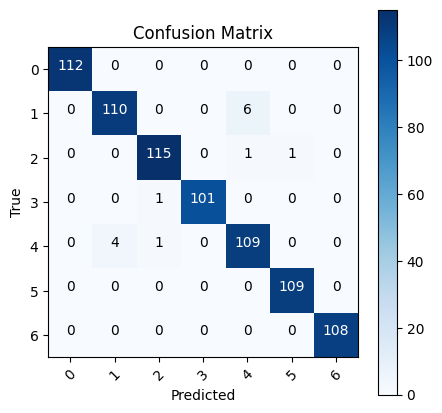

Rodada: 1 - seed: 2029

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       0.93      0.94      0.93       119
           2       1.00      0.99      1.00       109
           3       1.00      1.00      1.00       109
           4       0.93      0.92      0.93       119
           5       1.00      1.00      1.00       101
           6       1.00      1.00      1.00       112

    accuracy                           0.98       778
   macro avg       0.98      0.98      0.98       778
weighted avg       0.98      0.98      0.98       778



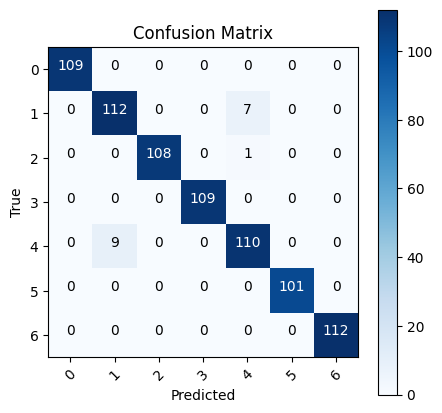

Rodada: 2 - seed: 1581

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       0.93      0.92      0.93       114
           2       0.99      0.98      0.99       106
           3       1.00      0.99      1.00       107
           4       0.93      0.94      0.93       121
           5       0.99      1.00      1.00       103
           6       1.00      1.00      1.00       116

    accuracy                           0.98       778
   macro avg       0.98      0.98      0.98       778
weighted avg       0.98      0.98      0.98       778



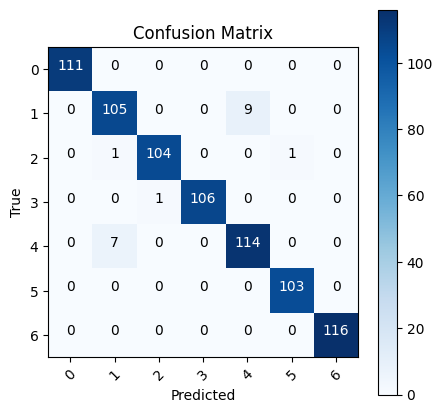

Rodada: 3 - seed: 7399

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       116
           1       0.98      0.99      0.98        97
           2       0.98      0.98      0.98       114
           3       1.00      0.98      0.99       127
           4       0.96      0.97      0.96        99
           5       0.99      1.00      1.00       112
           6       1.00      0.99      1.00       113

    accuracy                           0.99       778
   macro avg       0.99      0.99      0.99       778
weighted avg       0.99      0.99      0.99       778



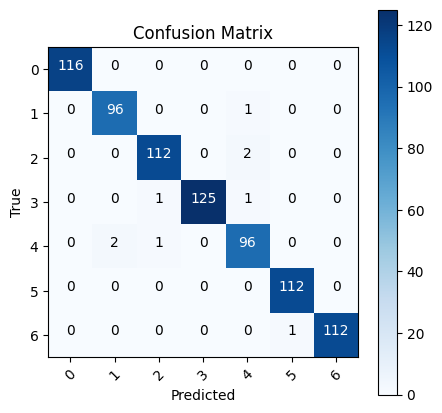

Rodada: 4 - seed: 4964

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       0.95      0.95      0.95       112
           2       0.98      0.99      0.98        95
           3       1.00      0.99      1.00       131
           4       0.94      0.95      0.95       120
           5       1.00      1.00      1.00       107
           6       1.00      1.00      1.00       112

    accuracy                           0.98       778
   macro avg       0.98      0.98      0.98       778
weighted avg       0.98      0.98      0.98       778



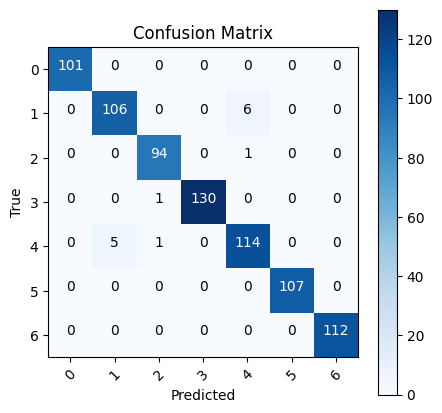

Rodada: 5 - seed: 5677

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       0.96      0.96      0.96       116
           2       0.98      0.98      0.98       119
           3       0.99      0.99      0.99       121
           4       0.95      0.95      0.95       108
           5       0.99      1.00      1.00       100
           6       1.00      0.99      1.00       115

    accuracy                           0.98       778
   macro avg       0.98      0.98      0.98       778
weighted avg       0.98      0.98      0.98       778



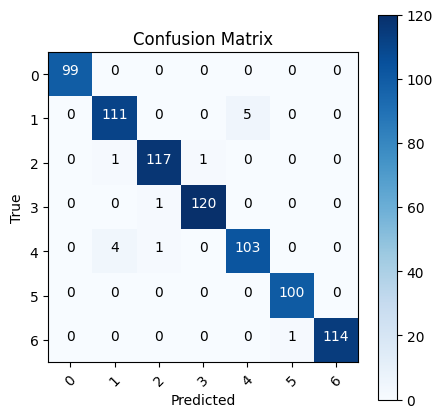

Rodada: 6 - seed: 1535

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       0.98      0.98      0.98       109
           2       0.96      0.99      0.98       109
           3       0.99      0.97      0.98       108
           4       0.98      0.98      0.98       123
           5       1.00      1.00      1.00       114
           6       1.00      1.00      1.00       110

    accuracy                           0.99       778
   macro avg       0.99      0.99      0.99       778
weighted avg       0.99      0.99      0.99       778



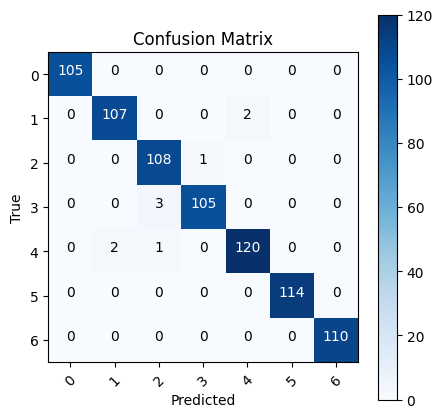

Rodada: 7 - seed: 1297

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       0.94      0.96      0.95       116
           2       1.00      0.98      0.99       124
           3       0.98      1.00      0.99       110
           4       0.95      0.94      0.94       117
           5       1.00      1.00      1.00        94
           6       1.00      1.00      1.00       119

    accuracy                           0.98       778
   macro avg       0.98      0.98      0.98       778
weighted avg       0.98      0.98      0.98       778



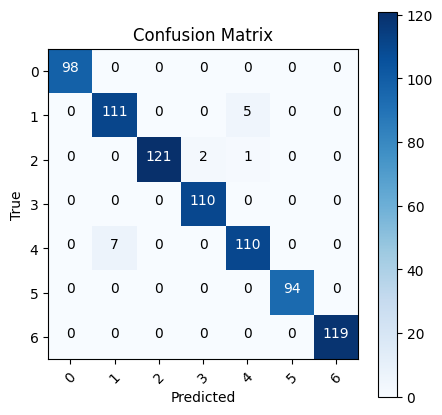

Rodada: 8 - seed: 3440

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.96      0.93      0.94       117
           2       0.99      0.99      0.99       138
           3       1.00      0.99      1.00       108
           4       0.93      0.96      0.94       116
           5       1.00      1.00      1.00       108
           6       1.00      1.00      1.00        91

    accuracy                           0.98       778
   macro avg       0.98      0.98      0.98       778
weighted avg       0.98      0.98      0.98       778



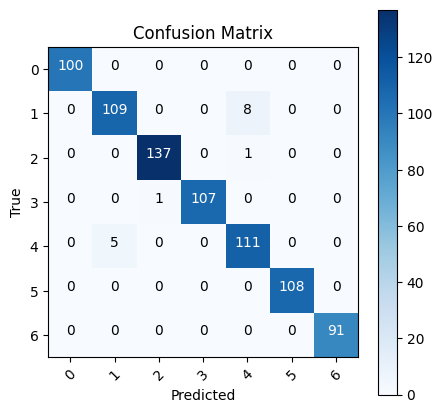

Rodada: 9 - seed: 3839

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       108
           1       0.95      0.94      0.94       110
           2       0.99      0.96      0.97       119
           3       1.00      0.98      0.99       124
           4       0.91      0.96      0.93       119
           5       0.98      1.00      0.99       103
           6       1.00      1.00      1.00        95

    accuracy                           0.97       778
   macro avg       0.98      0.98      0.98       778
weighted avg       0.97      0.97      0.97       778



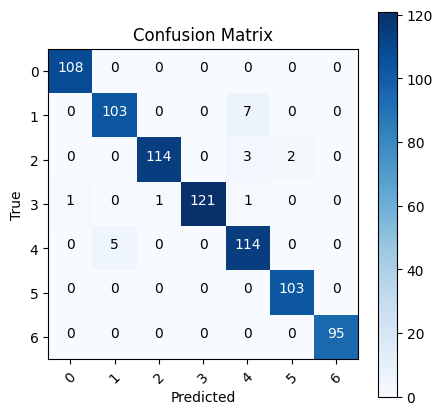

Rodada: 10 - seed: 7340

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       105
           1       0.94      0.97      0.95       109
           2       0.98      0.99      0.98       124
           3       0.99      0.98      0.99       104
           4       0.96      0.93      0.95       113
           5       1.00      0.97      0.99       106
           6       1.00      1.00      1.00       117

    accuracy                           0.98       778
   macro avg       0.98      0.98      0.98       778
weighted avg       0.98      0.98      0.98       778



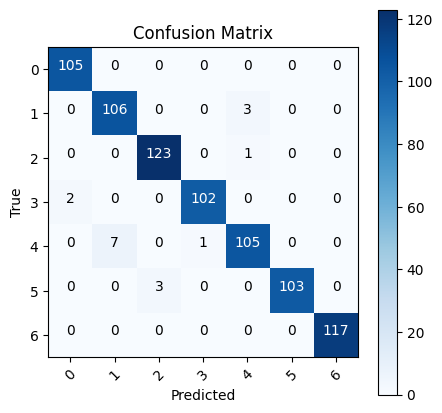

Rodada: 11 - seed: 5764

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       115
           1       0.95      0.94      0.95       124
           2       0.97      0.98      0.98       106
           3       0.99      0.97      0.98       103
           4       0.95      0.94      0.95       127
           5       0.99      1.00      1.00       102
           6       1.00      1.00      1.00       101

    accuracy                           0.98       778
   macro avg       0.98      0.98      0.98       778
weighted avg       0.98      0.98      0.98       778



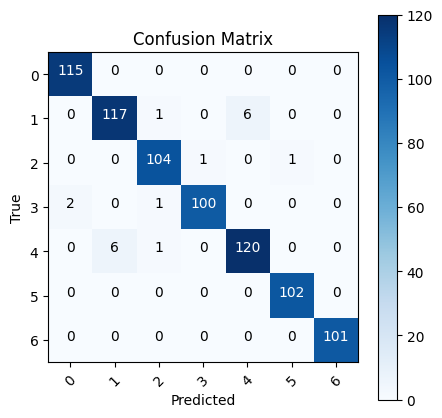

Rodada: 12 - seed: 5904

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       110
           1       0.94      0.96      0.95       102
           2       0.97      1.00      0.99       100
           3       1.00      0.98      0.99       121
           4       0.97      0.94      0.95       119
           5       1.00      1.00      1.00       125
           6       1.00      1.00      1.00       101

    accuracy                           0.98       778
   macro avg       0.98      0.98      0.98       778
weighted avg       0.98      0.98      0.98       778



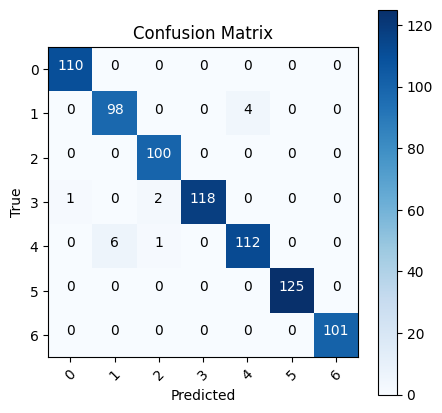

Rodada: 13 - seed: 2227

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       0.93      0.96      0.94       120
           2       0.97      0.98      0.98       114
           3       0.99      0.98      0.98        93
           4       0.95      0.93      0.94       134
           5       1.00      0.98      0.99       116
           6       1.00      1.00      1.00        96

    accuracy                           0.97       778
   macro avg       0.98      0.98      0.98       778
weighted avg       0.97      0.97      0.97       778



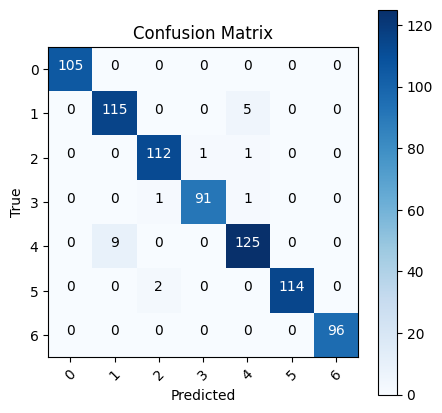

Rodada: 14 - seed: 4405

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       0.96      0.94      0.95       113
           2       1.00      0.97      0.99       109
           3       0.99      0.99      0.99       112
           4       0.93      0.97      0.95       116
           5       1.00      1.00      1.00       102
           6       1.00      1.00      1.00       119

    accuracy                           0.98       778
   macro avg       0.98      0.98      0.98       778
weighted avg       0.98      0.98      0.98       778



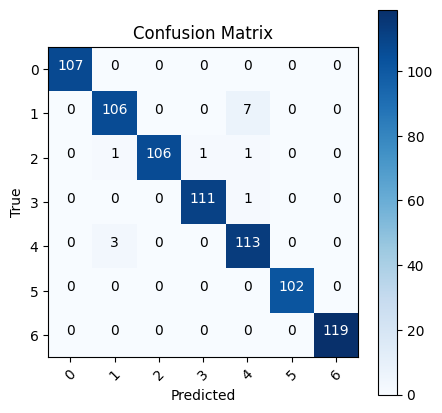

Rodada: 15 - seed: 4725

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       0.90      0.95      0.92       115
           2       0.99      0.97      0.98       118
           3       0.98      0.99      0.99       119
           4       0.94      0.88      0.91       101
           5       0.98      1.00      0.99       105
           6       1.00      1.00      1.00       102

    accuracy                           0.97       778
   macro avg       0.97      0.97      0.97       778
weighted avg       0.97      0.97      0.97       778



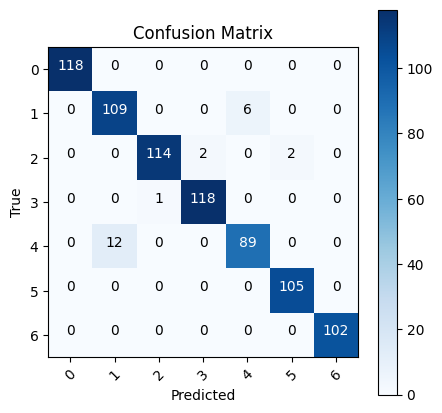

Rodada: 16 - seed: 5757

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       0.97      0.93      0.95       104
           2       1.00      0.99      1.00       126
           3       1.00      0.99      1.00       119
           4       0.91      0.97      0.94        97
           5       1.00      1.00      1.00       125
           6       1.00      1.00      1.00       102

    accuracy                           0.98       778
   macro avg       0.98      0.98      0.98       778
weighted avg       0.99      0.98      0.98       778



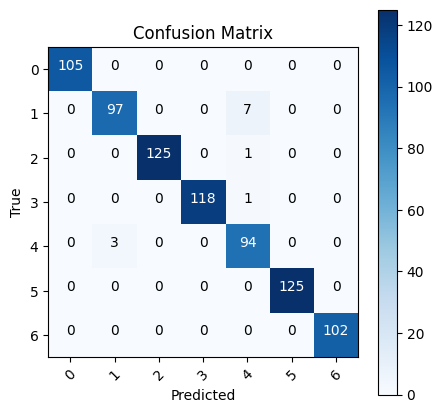

Rodada: 17 - seed: 7318

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       0.89      0.98      0.94       111
           2       1.00      0.99      1.00       106
           3       1.00      1.00      1.00       109
           4       0.97      0.89      0.93       114
           5       1.00      1.00      1.00       102
           6       1.00      1.00      1.00       126

    accuracy                           0.98       778
   macro avg       0.98      0.98      0.98       778
weighted avg       0.98      0.98      0.98       778



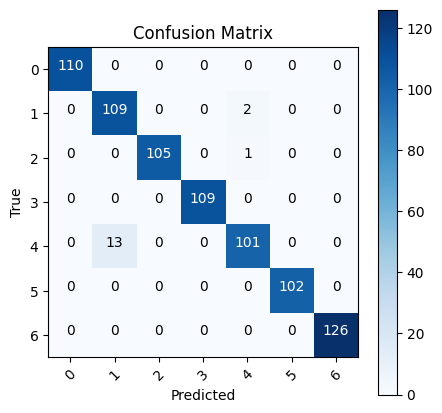

Rodada: 18 - seed: 1208

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       106
           1       0.94      0.96      0.95       122
           2       0.97      0.96      0.97       112
           3       0.97      0.97      0.97       119
           4       0.94      0.93      0.93       109
           5       1.00      1.00      1.00       112
           6       1.00      1.00      1.00        98

    accuracy                           0.97       778
   macro avg       0.97      0.97      0.97       778
weighted avg       0.97      0.97      0.97       778



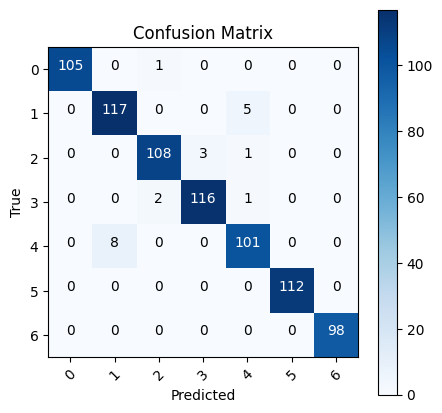

Rodada: 19 - seed: 572

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       0.95      0.96      0.96       114
           2       1.00      0.99      1.00       123
           3       1.00      0.99      1.00       117
           4       0.94      0.94      0.94       109
           5       1.00      1.00      1.00       101
           6       1.00      1.00      1.00       102

    accuracy                           0.98       778
   macro avg       0.98      0.98      0.98       778
weighted avg       0.98      0.98      0.98       778



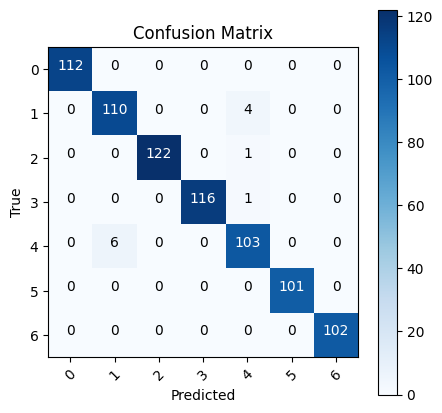

Rodada: 20 - seed: 7217

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       0.97      0.97      0.97       115
           2       0.97      0.97      0.97       108
           3       0.99      0.97      0.98       116
           4       0.96      0.97      0.96       115
           5       1.00      1.00      1.00        98
           6       1.00      1.00      1.00       115

    accuracy                           0.98       778
   macro avg       0.98      0.98      0.98       778
weighted avg       0.98      0.98      0.98       778



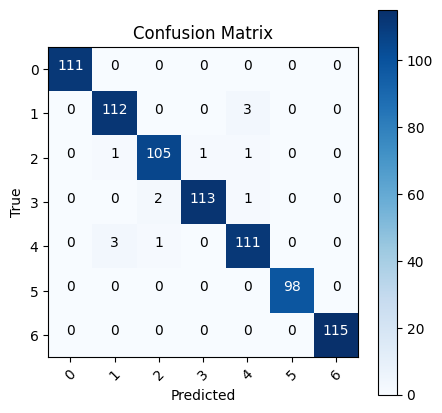

Rodada: 21 - seed: 3470

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       0.93      0.98      0.95       104
           2       0.99      0.96      0.98       126
           3       0.98      0.99      0.99       107
           4       0.97      0.93      0.95       116
           5       0.98      1.00      0.99       113
           6       1.00      1.00      1.00       109

    accuracy                           0.98       778
   macro avg       0.98      0.98      0.98       778
weighted avg       0.98      0.98      0.98       778



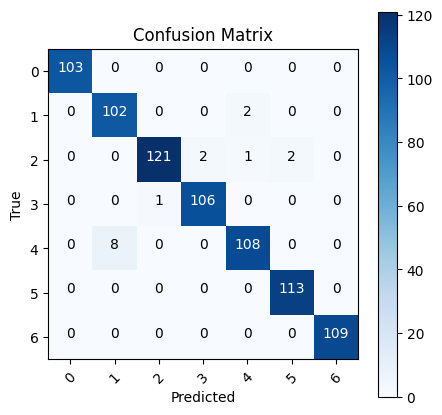

Rodada: 22 - seed: 4582

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        99
           1       0.97      0.94      0.96       116
           2       0.99      0.98      0.98       100
           3       0.99      0.98      0.99       117
           4       0.94      0.98      0.96       126
           5       0.99      1.00      1.00       111
           6       1.00      0.99      1.00       109

    accuracy                           0.98       778
   macro avg       0.98      0.98      0.98       778
weighted avg       0.98      0.98      0.98       778



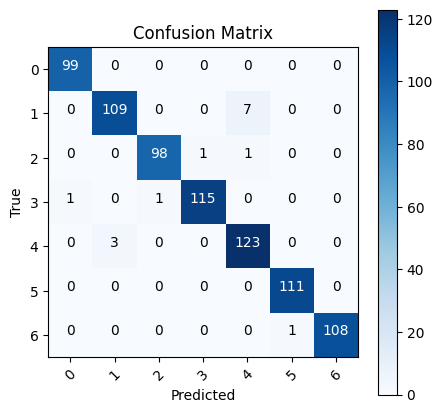

Rodada: 23 - seed: 4392

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.97      0.93      0.95       123
           2       1.00      0.99      1.00       112
           3       1.00      1.00      1.00       123
           4       0.92      0.97      0.95       107
           5       1.00      1.00      1.00       114
           6       1.00      1.00      1.00        99

    accuracy                           0.98       778
   macro avg       0.98      0.99      0.99       778
weighted avg       0.99      0.98      0.98       778



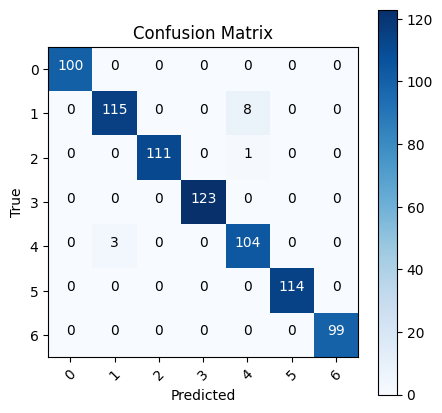

Rodada: 24 - seed: 7881

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       0.92      0.96      0.94       112
           2       1.00      0.98      0.99       120
           3       1.00      1.00      1.00       108
           4       0.95      0.93      0.94       122
           5       1.00      1.00      1.00        97
           6       1.00      1.00      1.00       113

    accuracy                           0.98       778
   macro avg       0.98      0.98      0.98       778
weighted avg       0.98      0.98      0.98       778



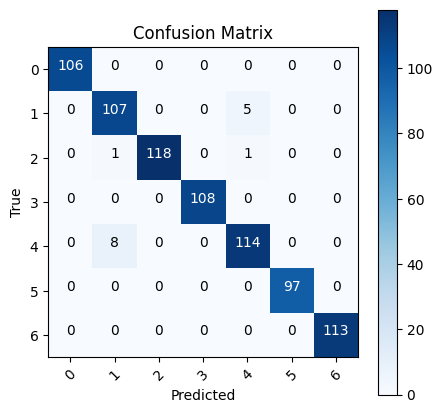

Rodada: 25 - seed: 709

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       0.96      0.96      0.96       133
           2       0.97      0.98      0.98       113
           3       1.00      1.00      1.00       113
           4       0.93      0.94      0.93        99
           5       1.00      0.98      0.99       110
           6       1.00      1.00      1.00       116

    accuracy                           0.98       778
   macro avg       0.98      0.98      0.98       778
weighted avg       0.98      0.98      0.98       778



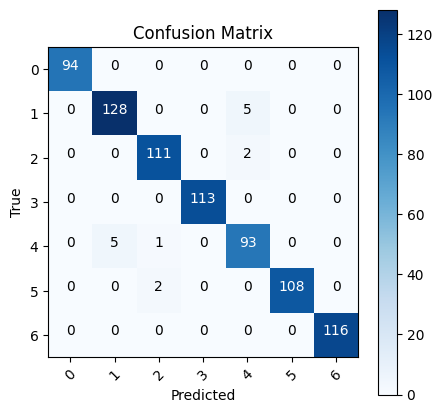

Rodada: 26 - seed: 5829

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       113
           1       0.97      0.98      0.98       119
           2       0.99      0.98      0.99       105
           3       1.00      0.98      0.99       121
           4       0.96      0.97      0.97       104
           5       1.00      1.00      1.00       110
           6       1.00      1.00      1.00       106

    accuracy                           0.99       778
   macro avg       0.99      0.99      0.99       778
weighted avg       0.99      0.99      0.99       778



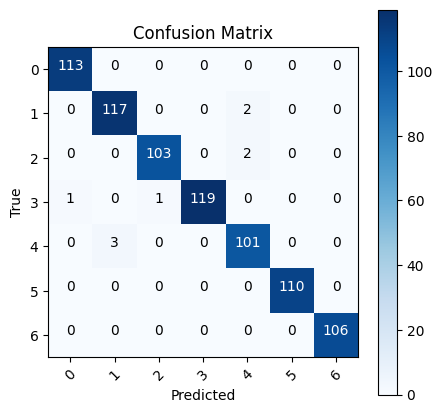

Rodada: 27 - seed: 1977

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       0.97      0.99      0.98       109
           2       0.98      0.99      0.98       124
           3       1.00      0.98      0.99       119
           4       0.99      0.97      0.98       117
           5       0.99      1.00      0.99        95
           6       1.00      1.00      1.00       115

    accuracy                           0.99       778
   macro avg       0.99      0.99      0.99       778
weighted avg       0.99      0.99      0.99       778



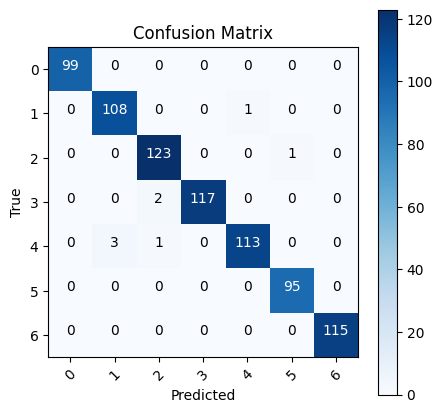

Rodada: 28 - seed: 4931

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       0.97      0.93      0.95        91
           2       1.00      0.98      0.99       126
           3       1.00      0.99      1.00       136
           4       0.93      0.97      0.95       102
           5       0.99      1.00      1.00       116
           6       1.00      1.00      1.00       101

    accuracy                           0.98       778
   macro avg       0.98      0.98      0.98       778
weighted avg       0.98      0.98      0.98       778



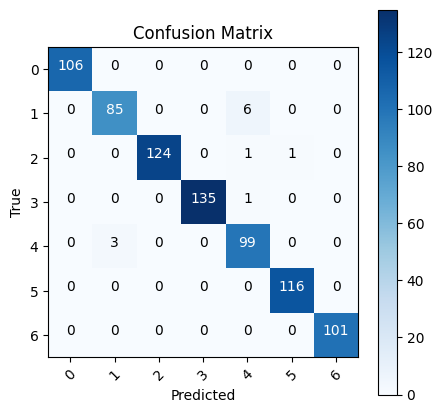

Rodada: 29 - seed: 3779

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        98
           1       0.93      0.96      0.95       100
           2       1.00      0.98      0.99       111
           3       0.99      0.98      0.99       121
           4       0.96      0.95      0.96       129
           5       1.00      1.00      1.00       113
           6       1.00      1.00      1.00       106

    accuracy                           0.98       778
   macro avg       0.98      0.98      0.98       778
weighted avg       0.98      0.98      0.98       778



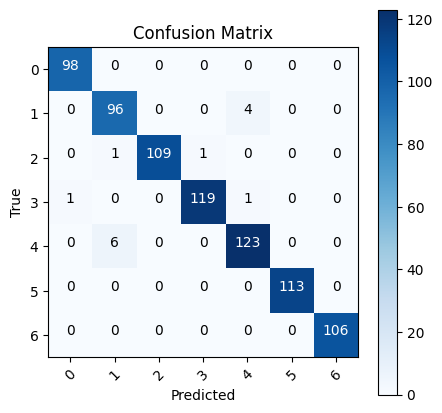

In [4]:
random_seeds = np.random.randint(0, 8000, 30)
print(f'seeds: {random_seeds}')



#dados de x e dados de y
colunas_drop = ["target"]
y = fs20DF["target"]
x = fs20DF.drop(columns=colunas_drop)


k=1

targets = ['0', '1', '2', '3', '4', '5', '6']
acc_scores = []

#treino e teste
for rodada, seed in enumerate(random_seeds):
    # Distribuindo os dados
    x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=seed)


    modelo_knn = make_pipeline(
        StandardScaler(),
        KNeighborsClassifier(n_neighbors=1)
        ).fit(
            x_treino,
            y_treino)

    # Realizando predição
    y_pred = modelo_knn.predict(x_teste)

    acc_scores.append(
    modelo_knn.score(x_teste, y_teste))

    print(f'Rodada: {rodada} - seed: {seed}\n')

    print(classification_report(y_teste, y_pred, target_names=targets))

    cm = confusion_matrix(y_teste, y_pred)

    # Plotando Matrizes Confusão
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    classes = targets
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i, j]), horizontalalignment='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

    plt.show()